# BO :

# Data Understanding :

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
data_path = "creditcard.csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)
print("it's a very imbalanced data...")

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
it's a very imbalanced data...


In [9]:
display(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


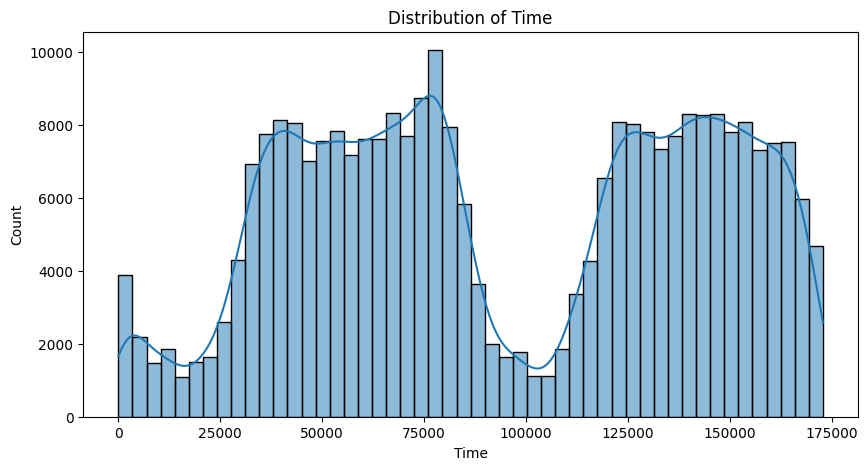

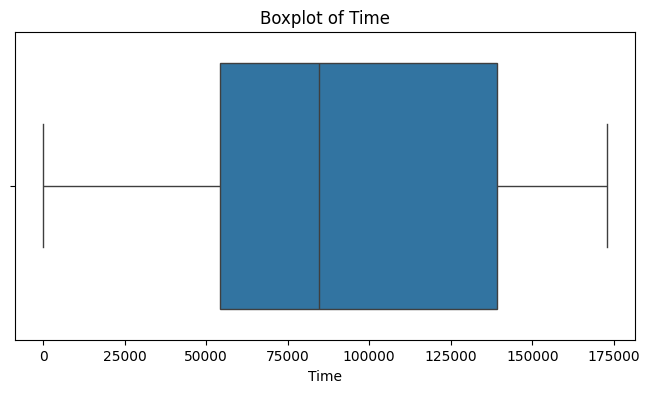

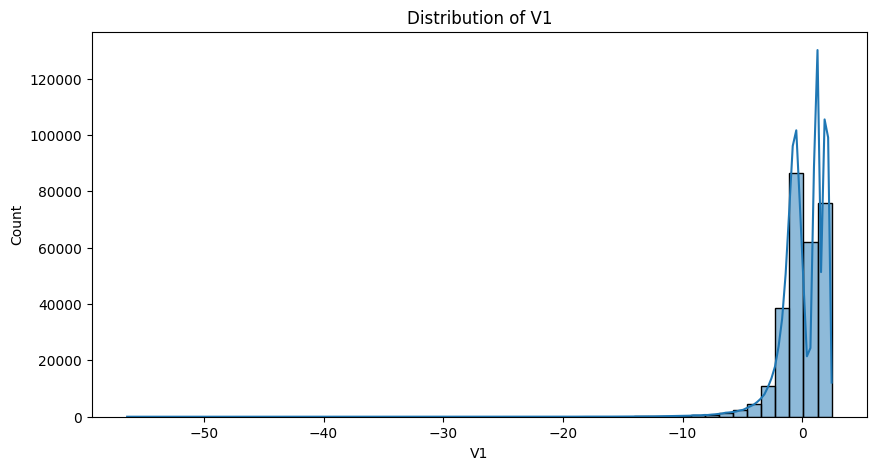

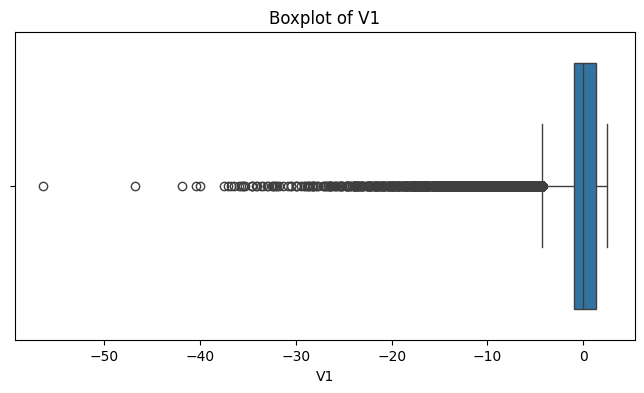

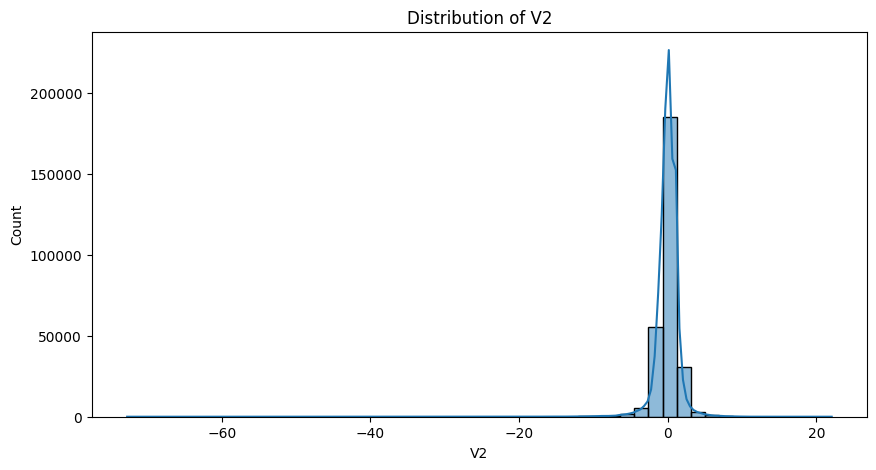

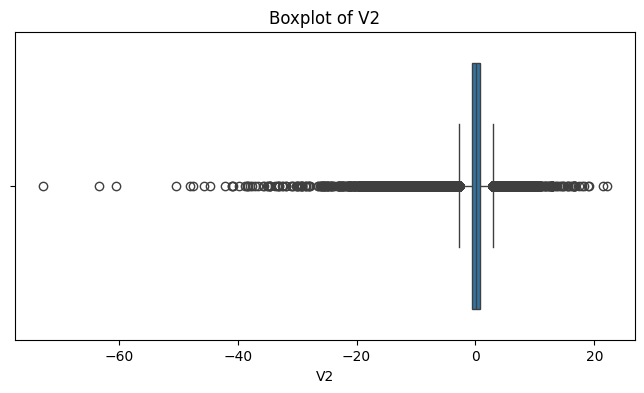

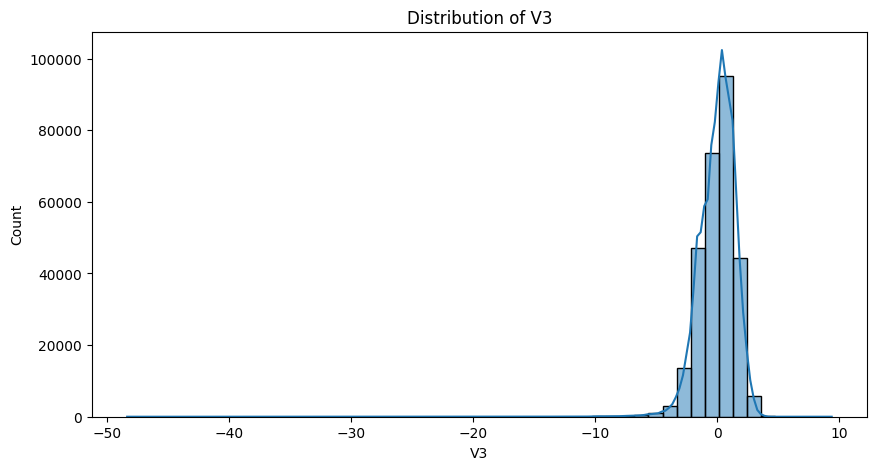

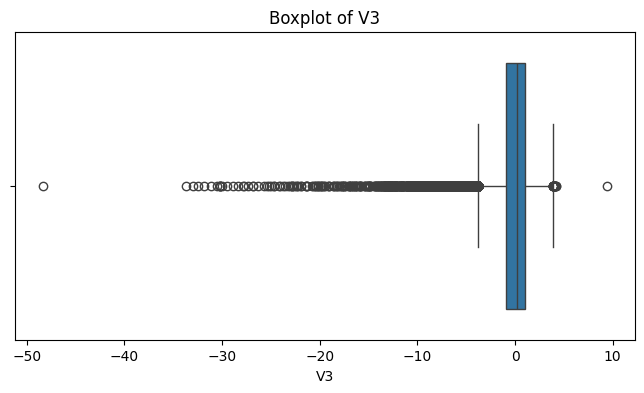

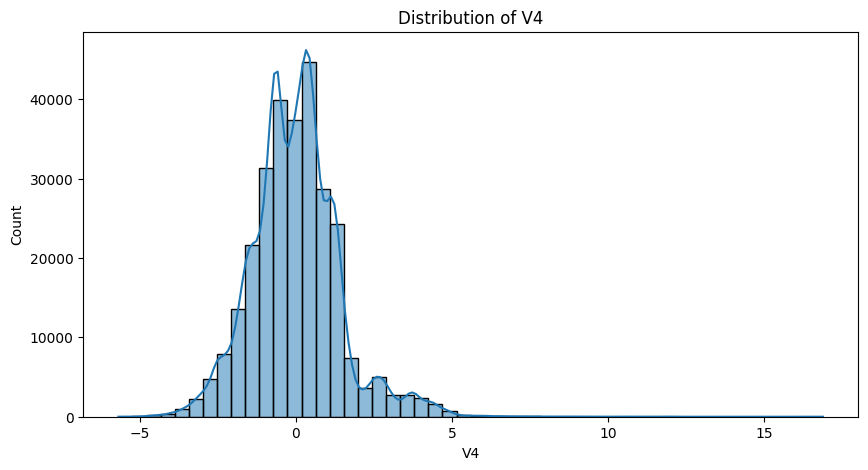

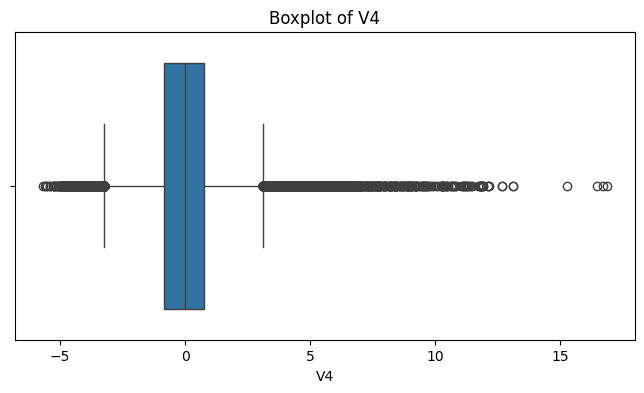

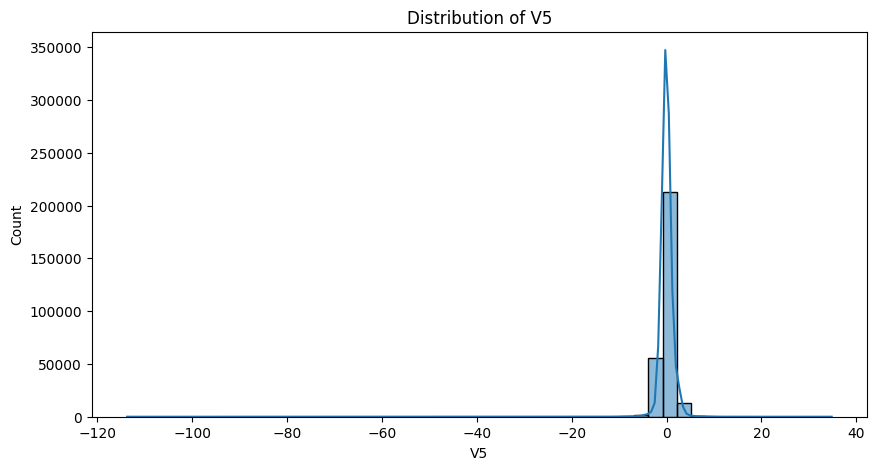

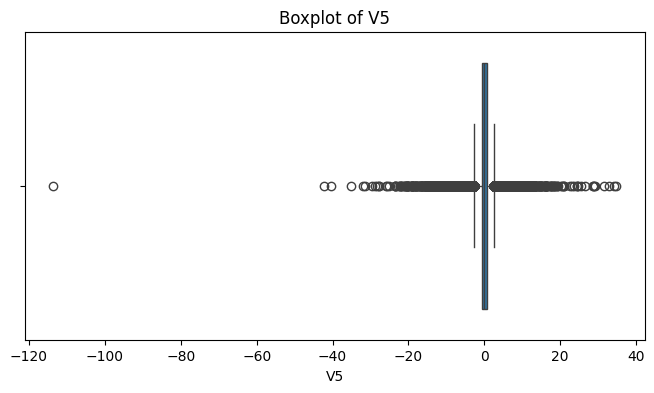

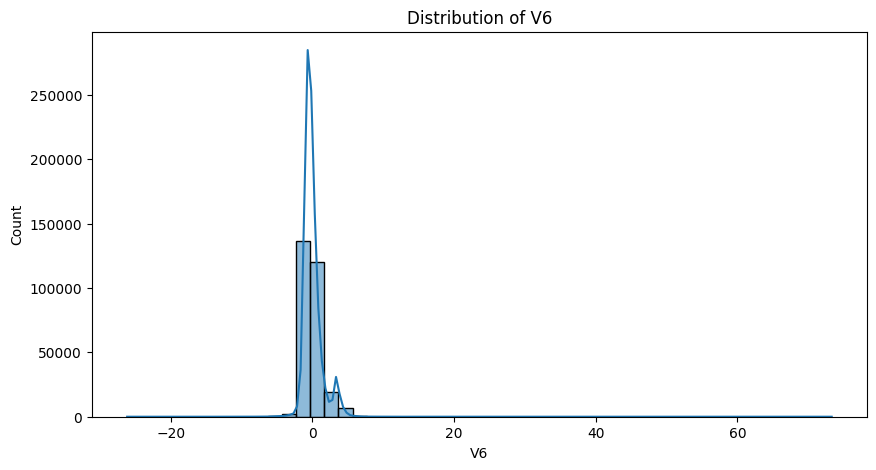

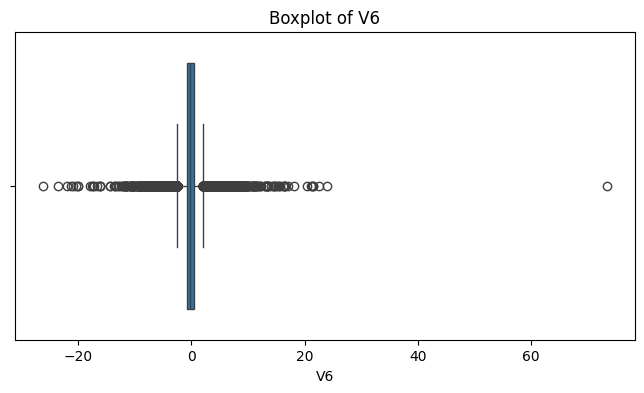

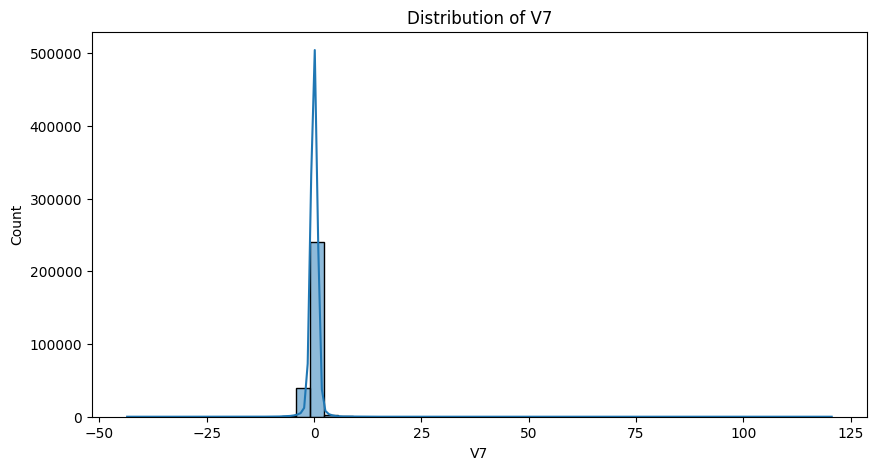

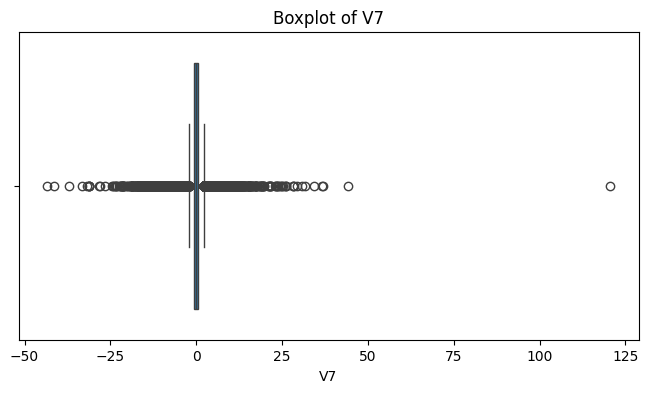

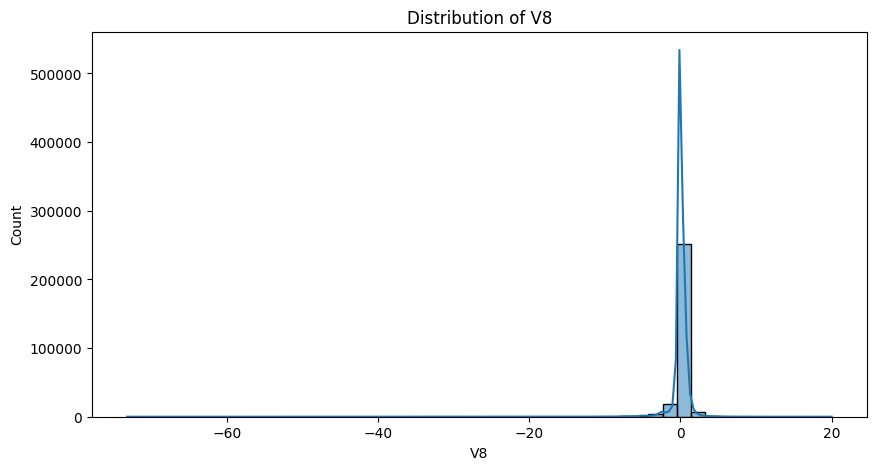

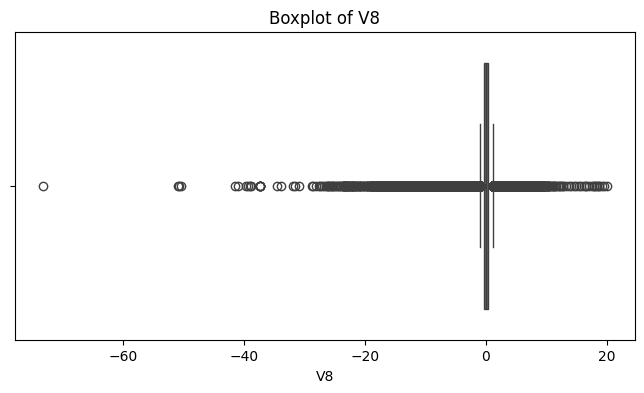

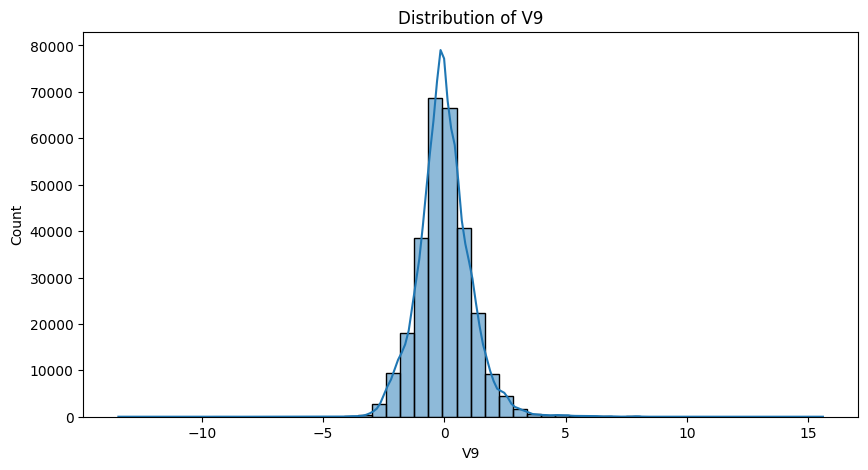

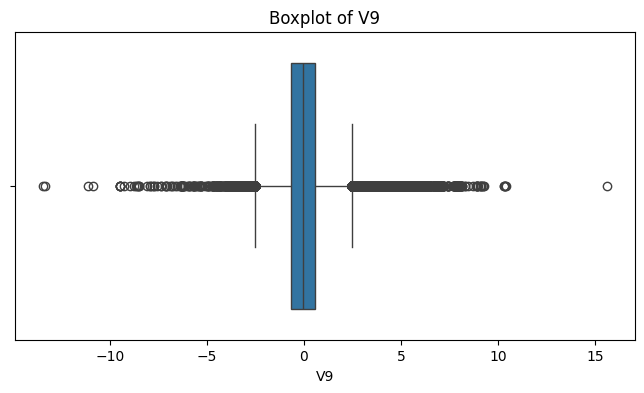

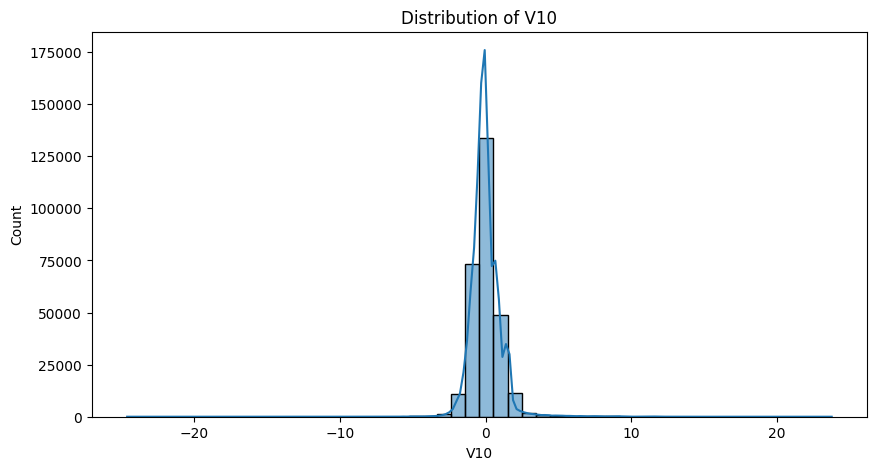

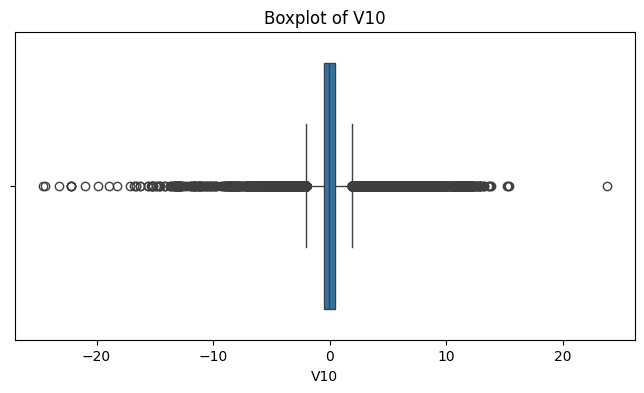

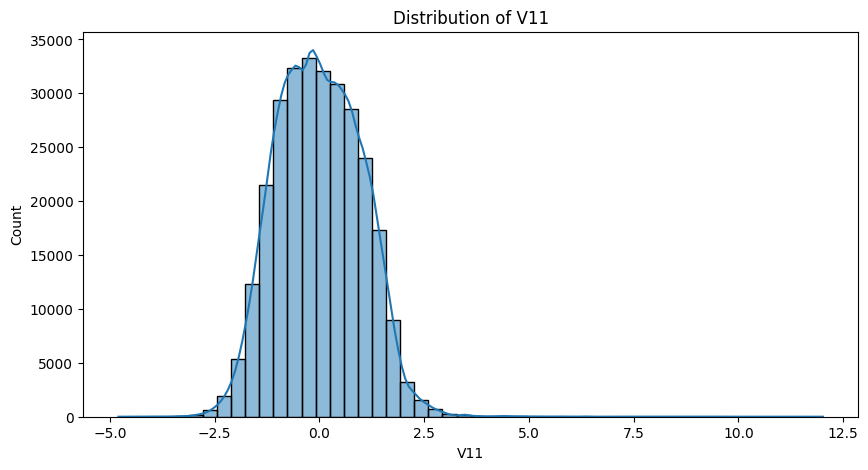

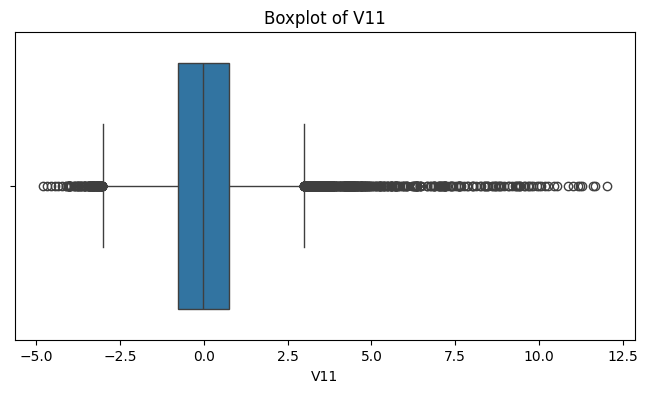

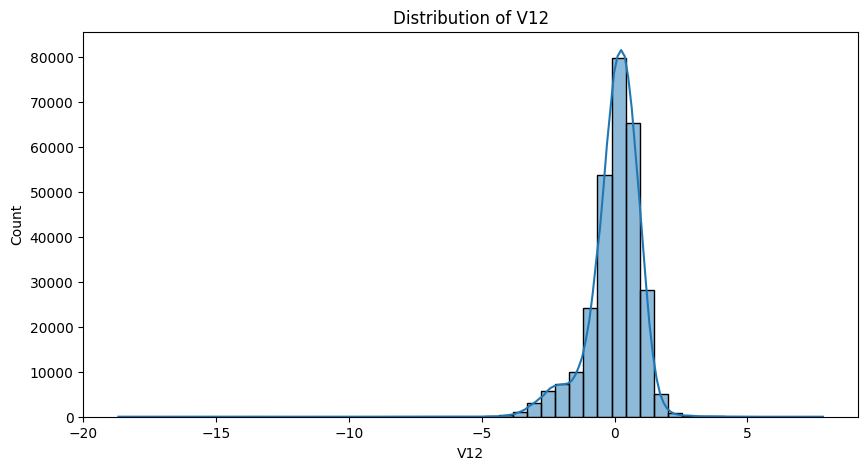

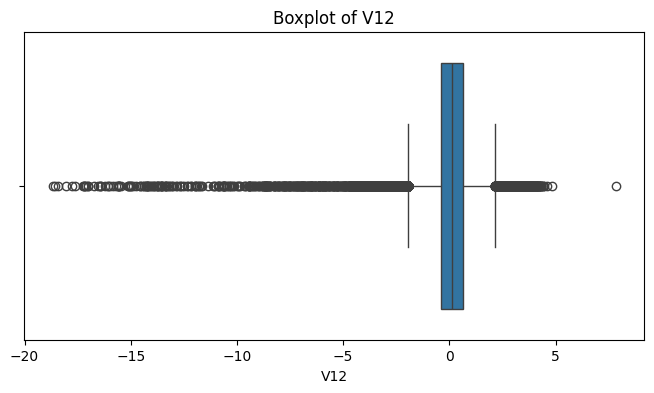

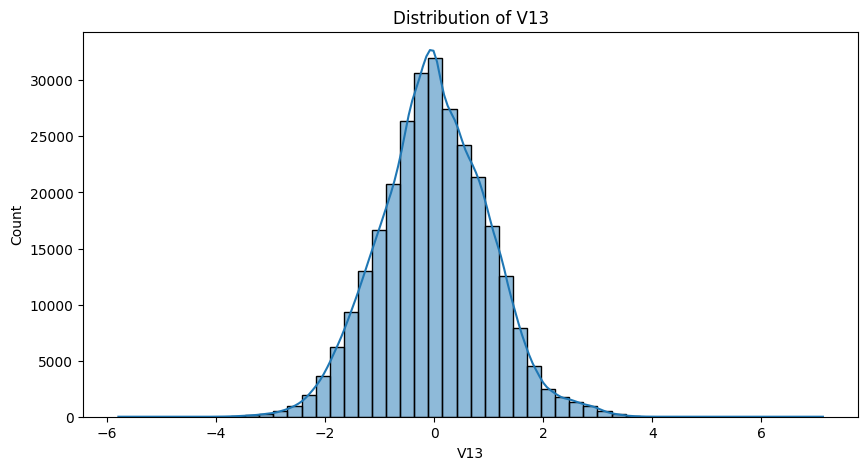

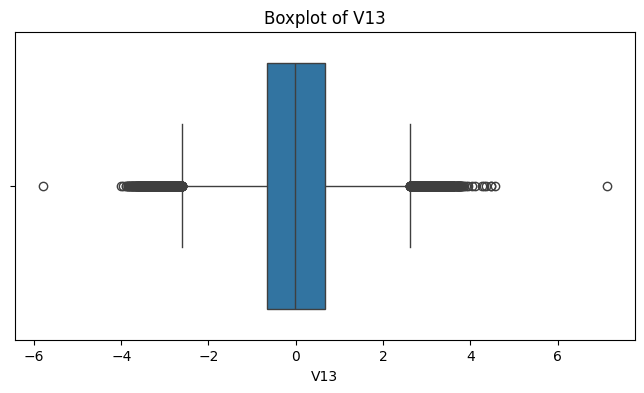

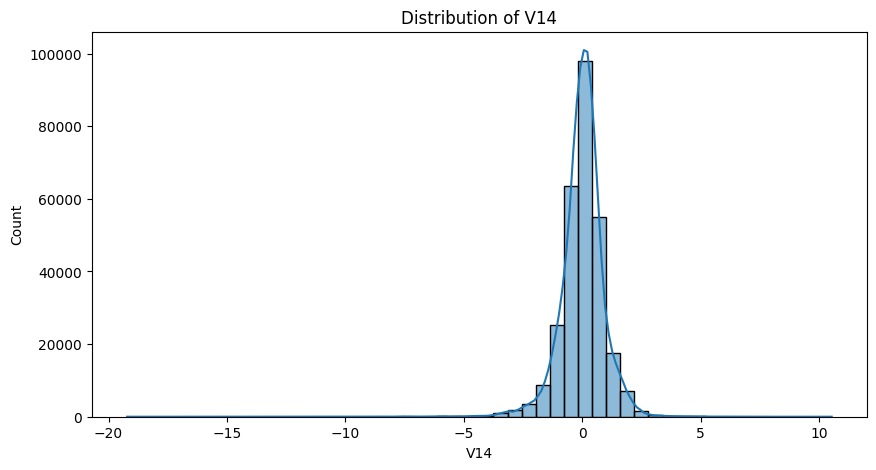

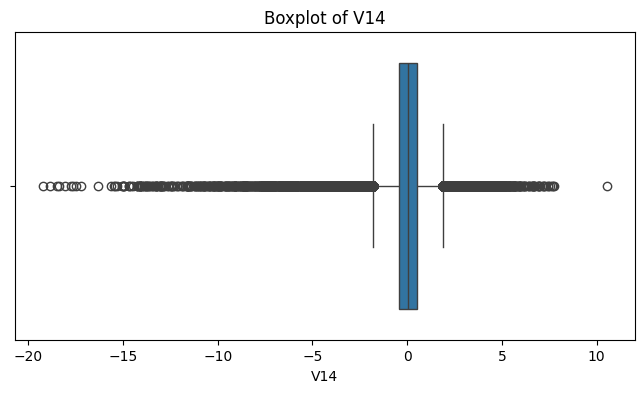

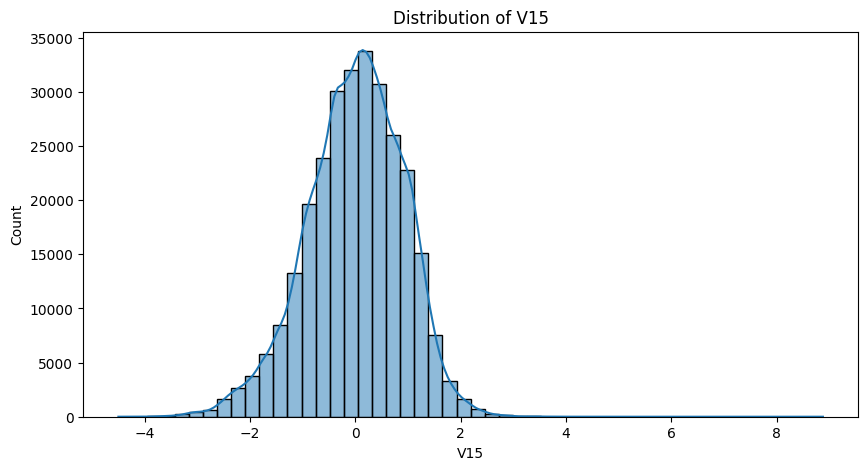

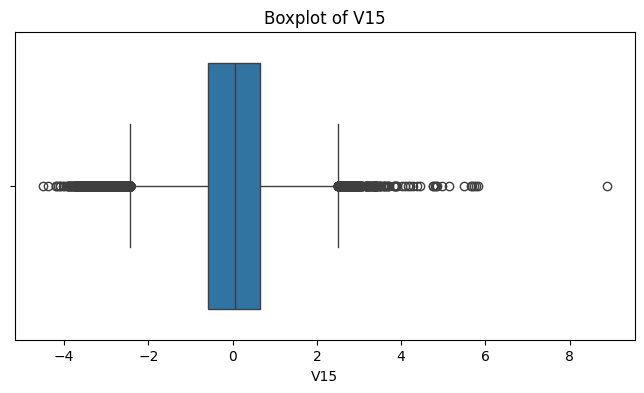

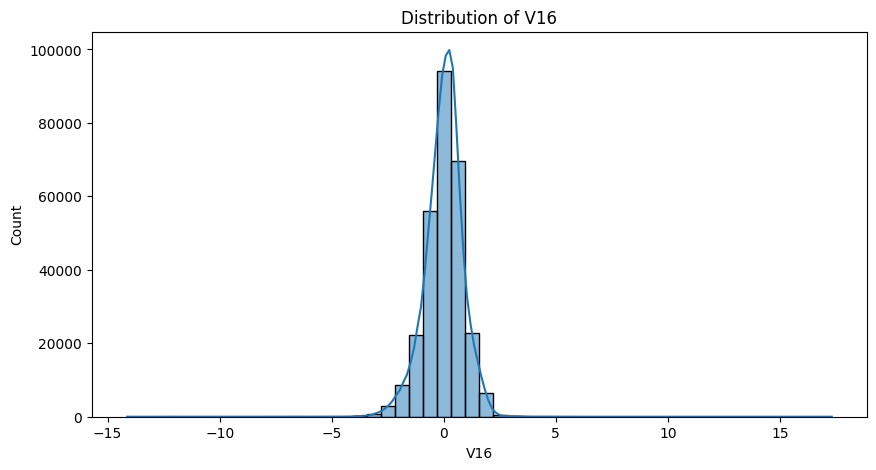

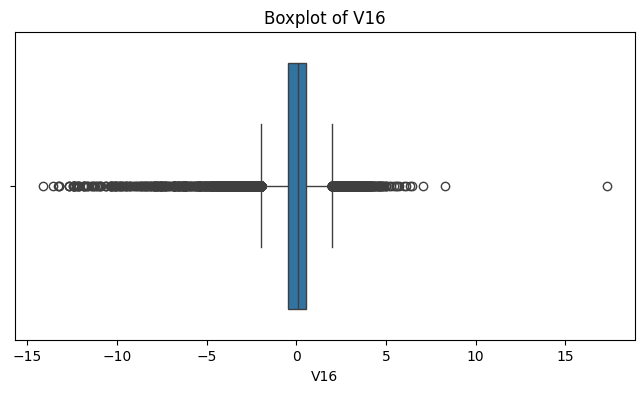

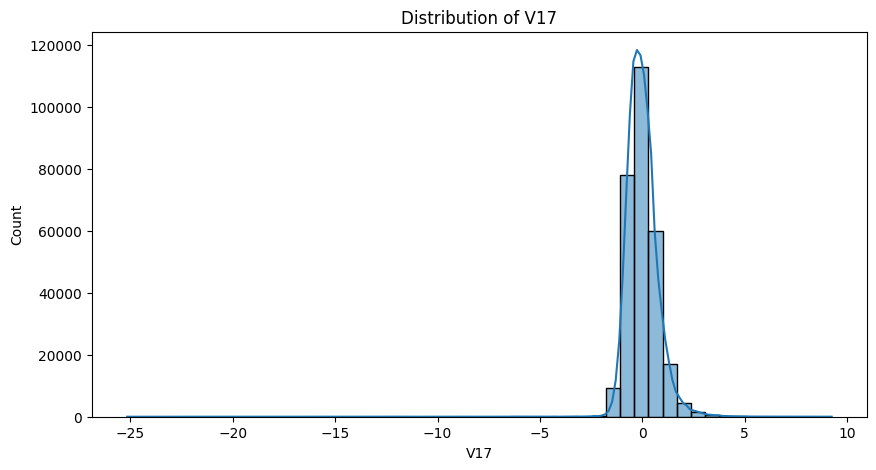

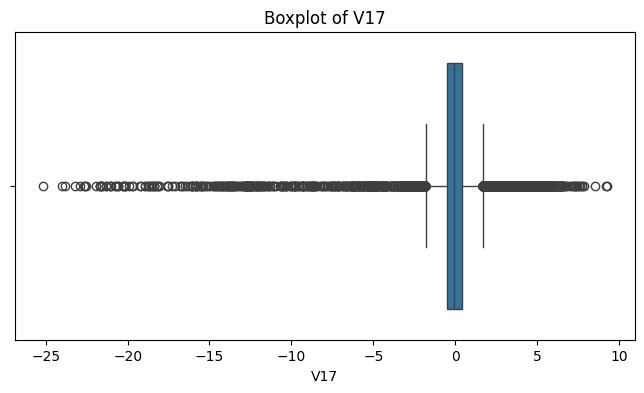

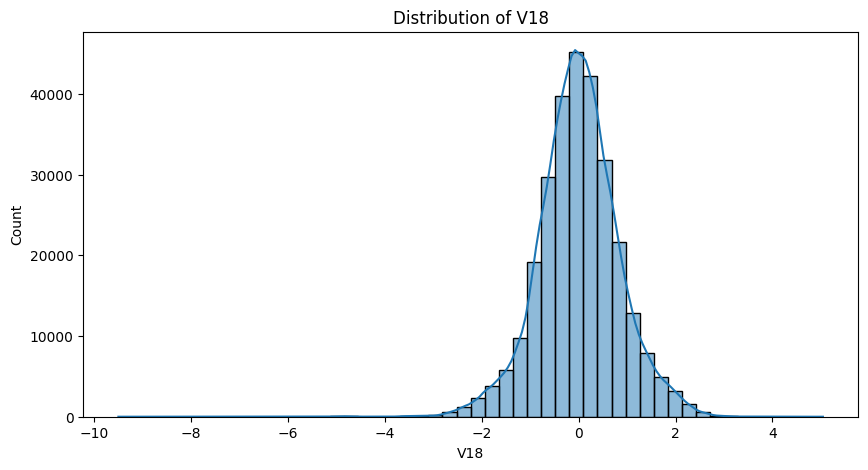

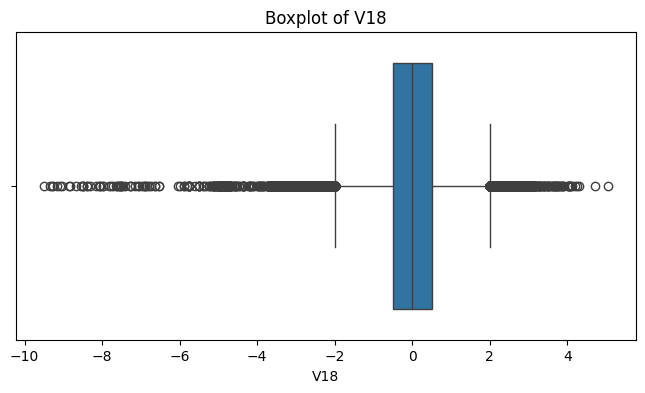

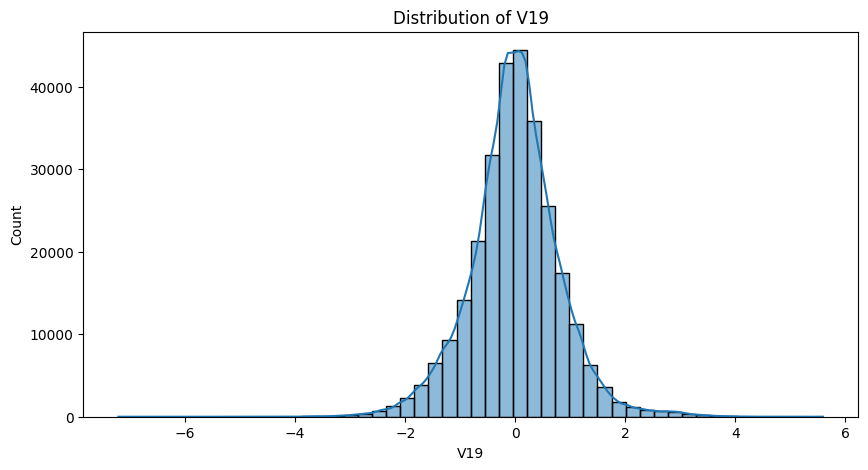

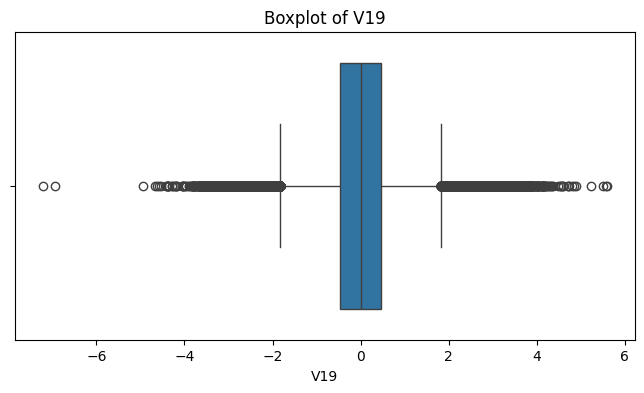

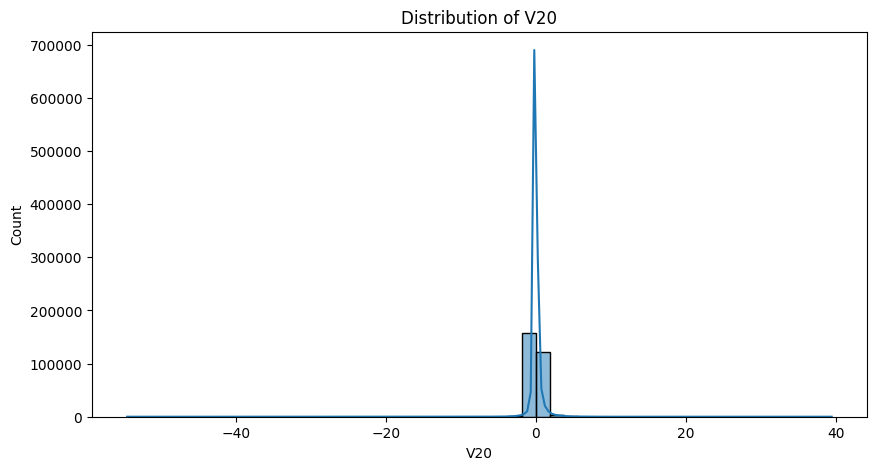

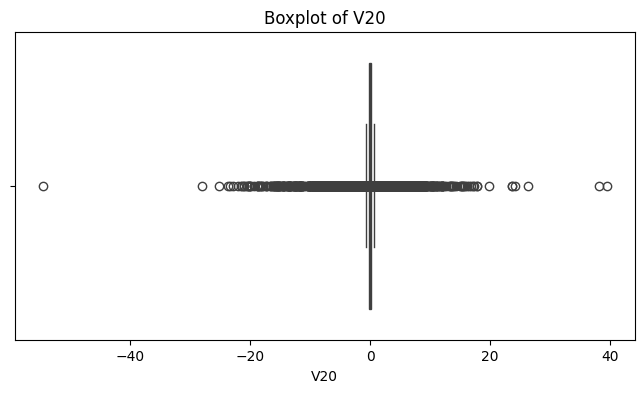

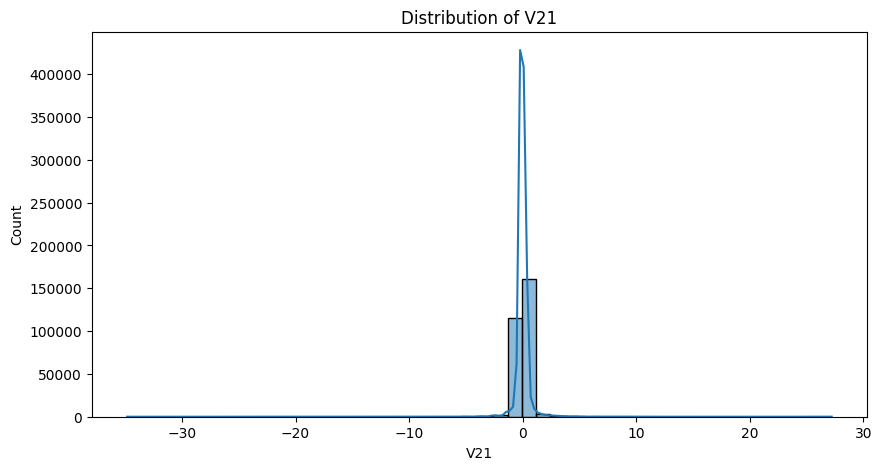

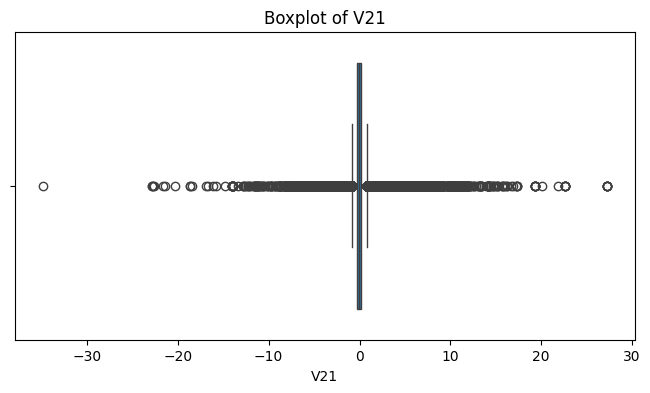

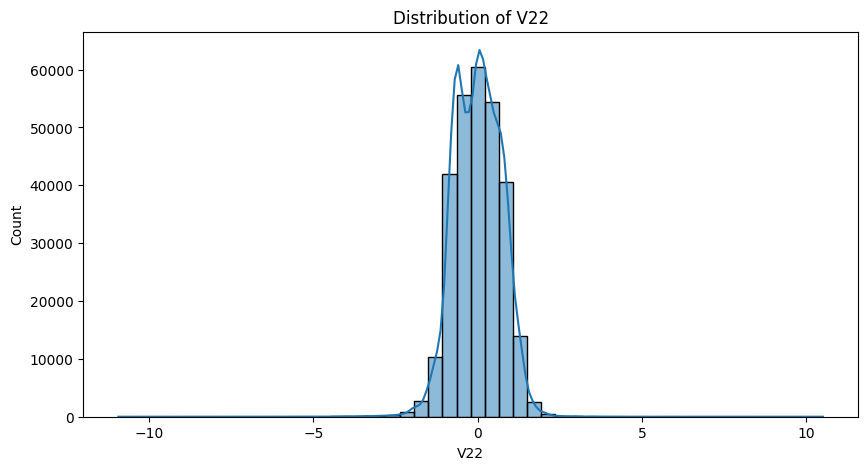

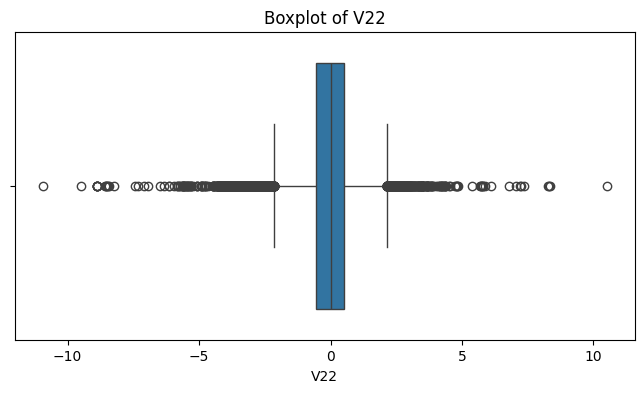

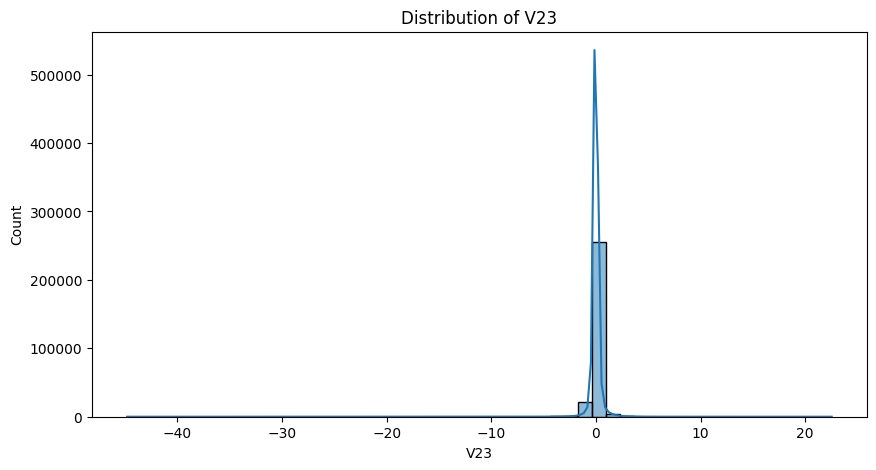

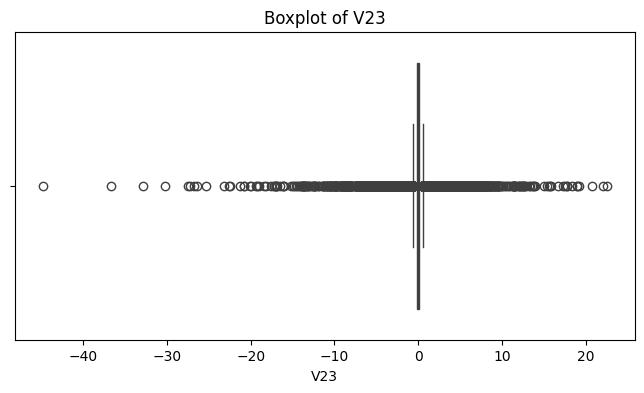

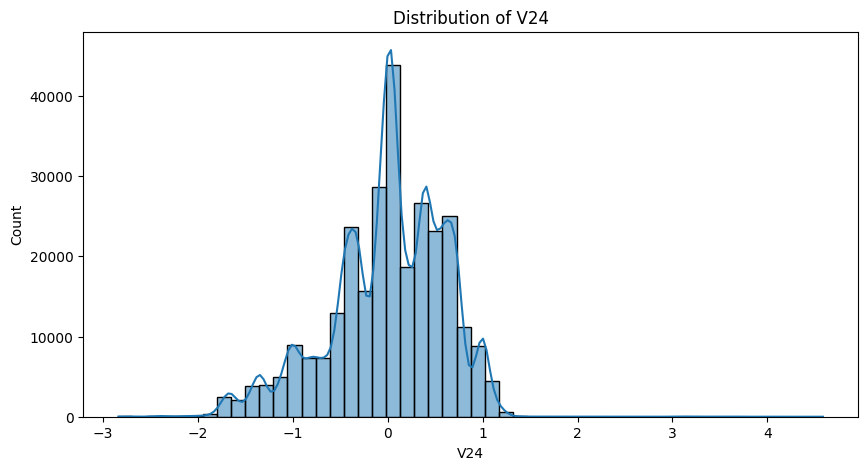

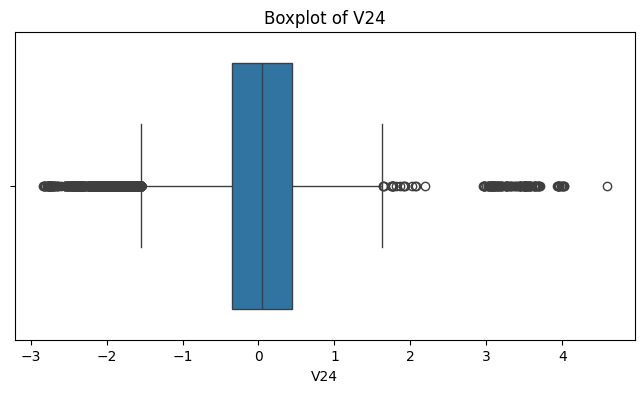

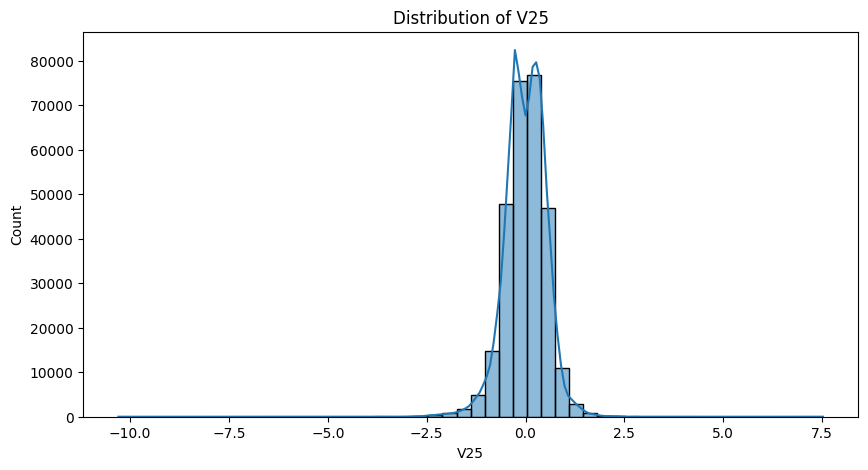

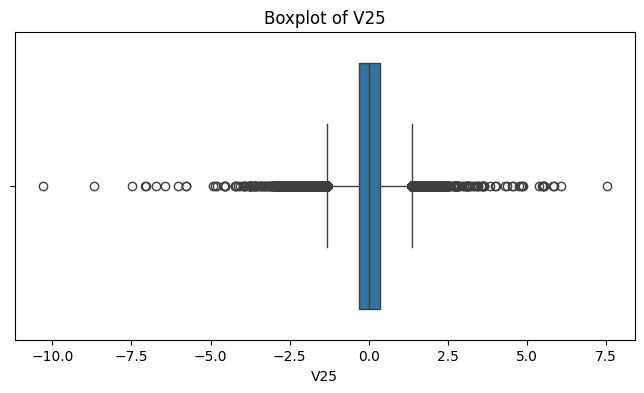

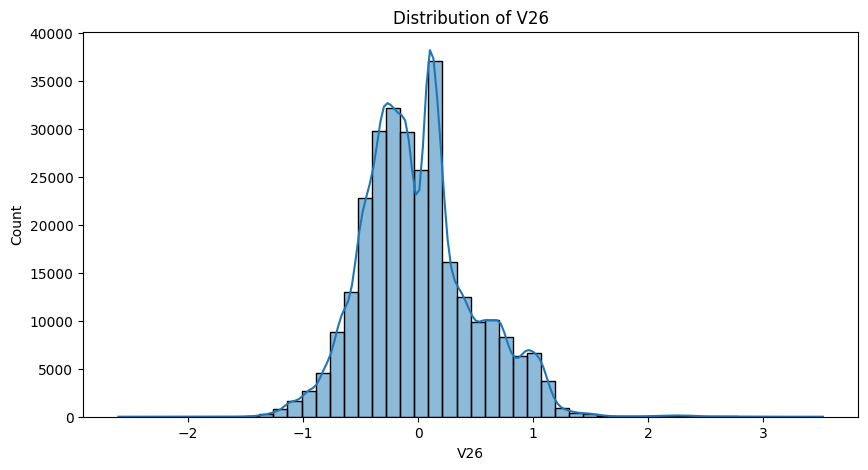

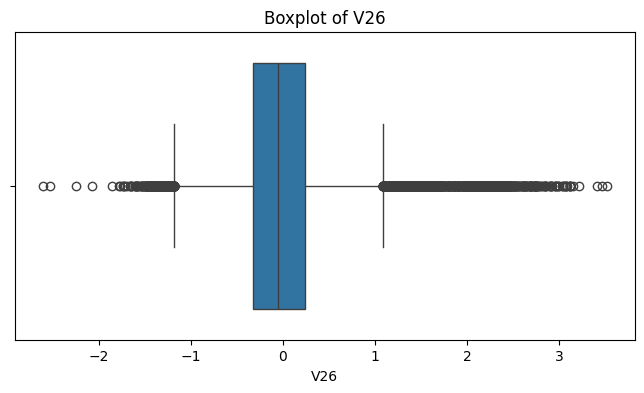

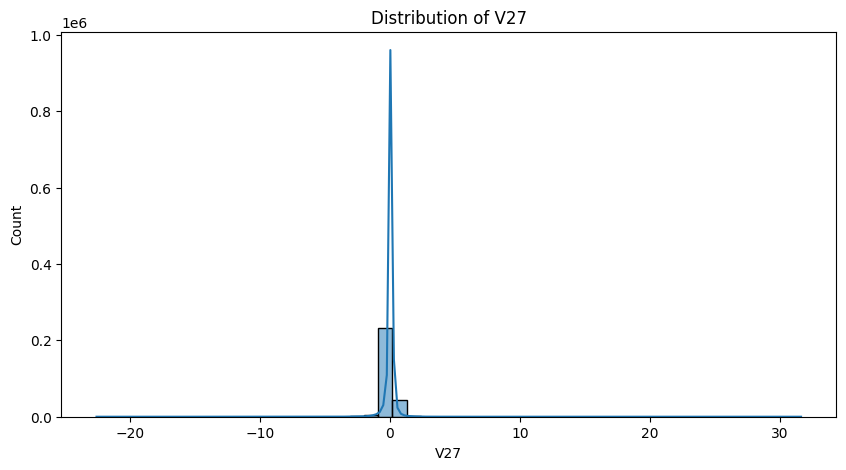

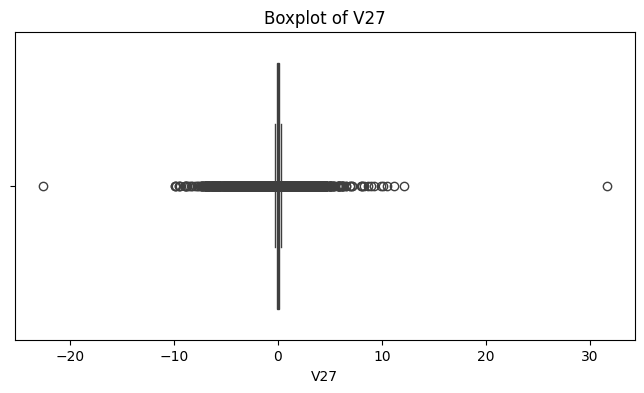

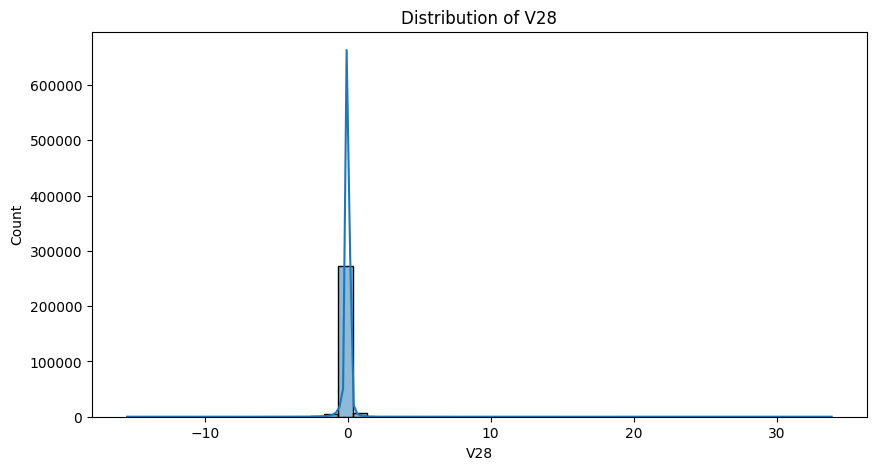

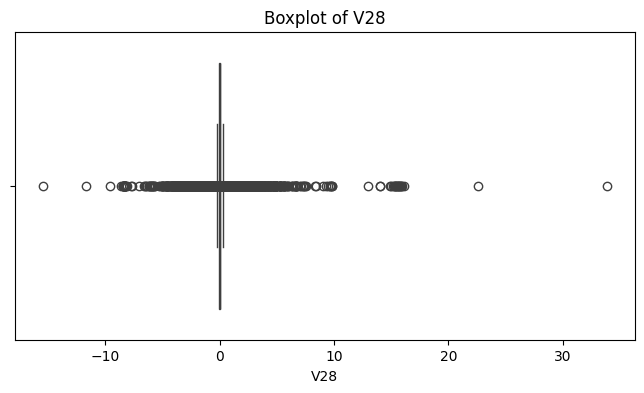

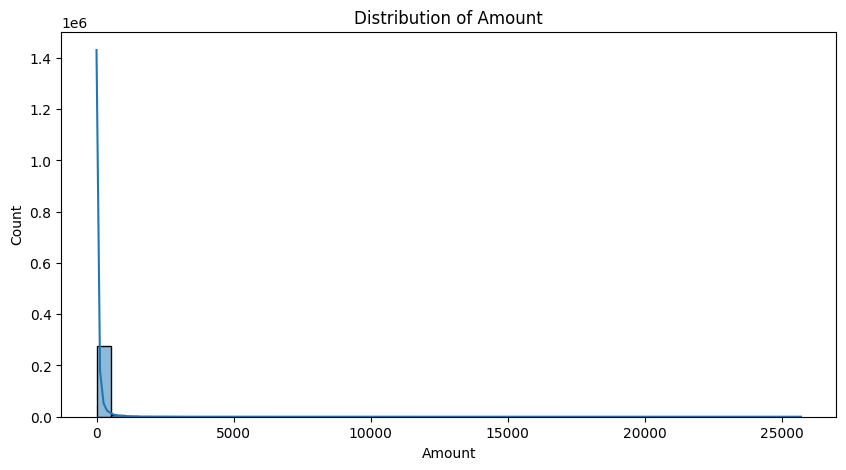

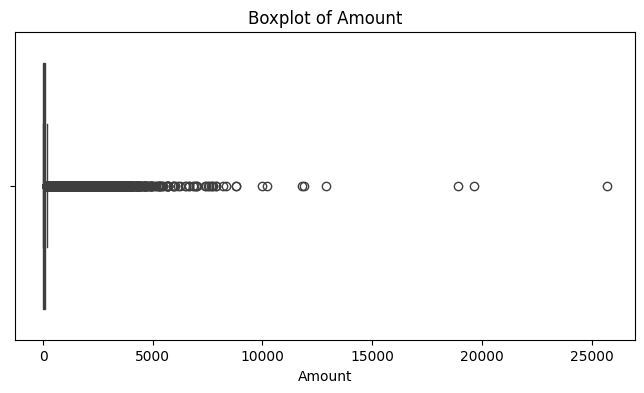

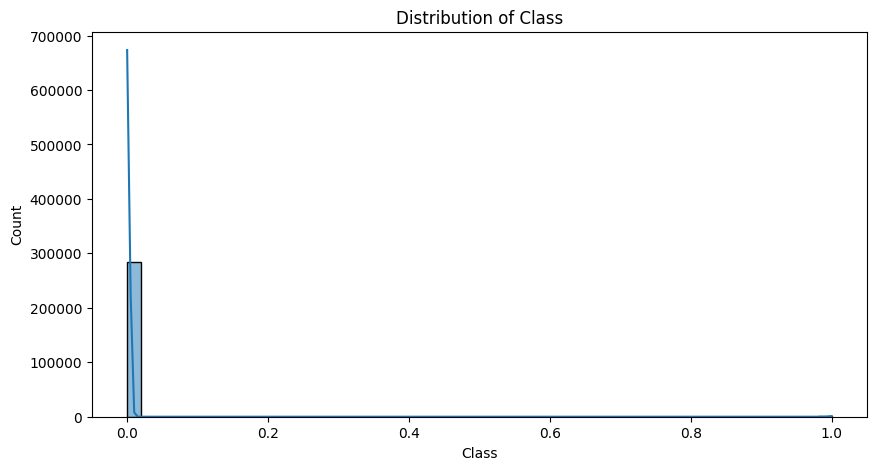

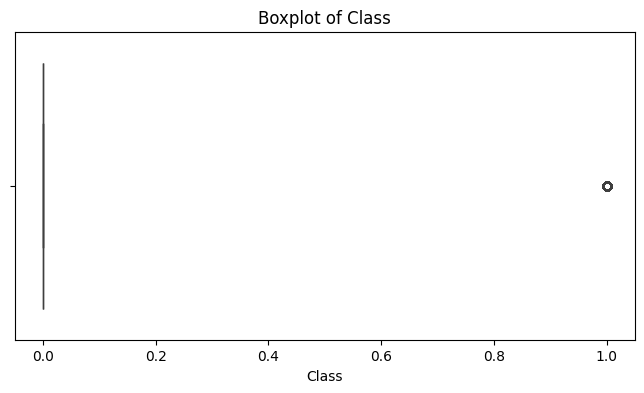

In [10]:

for col in df.columns:
    filtered = df[df[col] <= df[col].quantile(0.99)]

    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

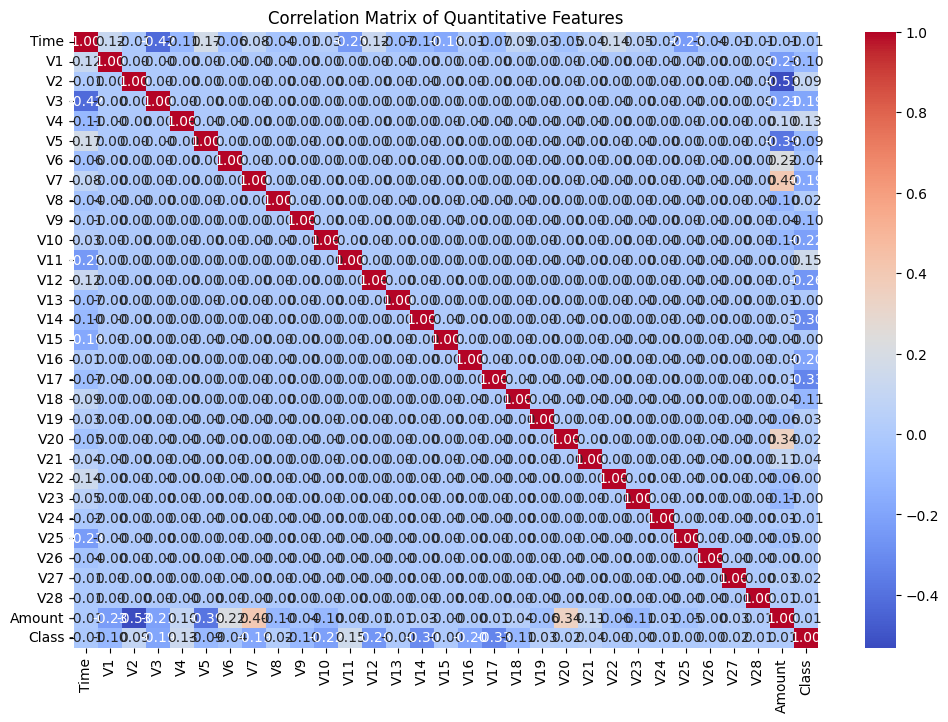

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Quantitative Features")
plt.show()


In [12]:
df.corr()['Class'].sort_values(ascending=False)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [13]:
for col in df.columns:
    if df[col].dtype != 'object':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")


Time: 0 outliers
V1: 7062 outliers
V2: 13526 outliers
V3: 3363 outliers
V4: 11148 outliers
V5: 12295 outliers
V6: 22965 outliers
V7: 8948 outliers
V8: 24134 outliers
V9: 8283 outliers
V10: 9496 outliers
V11: 780 outliers
V12: 15348 outliers
V13: 3368 outliers
V14: 14149 outliers
V15: 2894 outliers
V16: 8184 outliers
V17: 7420 outliers
V18: 7533 outliers
V19: 10205 outliers
V20: 27770 outliers
V21: 14497 outliers
V22: 1317 outliers
V23: 18541 outliers
V24: 4774 outliers
V25: 5367 outliers
V26: 5596 outliers
V27: 39163 outliers
V28: 30342 outliers
Amount: 31904 outliers
Class: 492 outliers


In [14]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'Class':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        
        total_outliers = len(outliers)
        fraud_outliers = outliers['Class'].sum()  # since fraud = 1
        nonfraud_outliers = total_outliers - fraud_outliers
        
        # Avoid division by zero
        fraud_pct = (fraud_outliers / total_outliers * 100) if total_outliers > 0 else 0
        
        print(f"{col}: {total_outliers} outliers | Fraud: {fraud_outliers} | Non-Fraud: {nonfraud_outliers} | %Fraud in Outliers: {fraud_pct:.2f}%")


Time: 0 outliers | Fraud: 0 | Non-Fraud: 0 | %Fraud in Outliers: 0.00%
V1: 7062 outliers | Fraud: 174 | Non-Fraud: 6888 | %Fraud in Outliers: 2.46%
V2: 13526 outliers | Fraud: 246 | Non-Fraud: 13280 | %Fraud in Outliers: 1.82%
V3: 3363 outliers | Fraud: 312 | Non-Fraud: 3051 | %Fraud in Outliers: 9.28%
V4: 11148 outliers | Fraud: 318 | Non-Fraud: 10830 | %Fraud in Outliers: 2.85%
V5: 12295 outliers | Fraud: 208 | Non-Fraud: 12087 | %Fraud in Outliers: 1.69%
V6: 22965 outliers | Fraud: 137 | Non-Fraud: 22828 | %Fraud in Outliers: 0.60%
V7: 8948 outliers | Fraud: 301 | Non-Fraud: 8647 | %Fraud in Outliers: 3.36%
V8: 24134 outliers | Fraud: 247 | Non-Fraud: 23887 | %Fraud in Outliers: 1.02%
V9: 8283 outliers | Fraud: 223 | Non-Fraud: 8060 | %Fraud in Outliers: 2.69%
V10: 9496 outliers | Fraud: 399 | Non-Fraud: 9097 | %Fraud in Outliers: 4.20%
V11: 780 outliers | Fraud: 294 | Non-Fraud: 486 | %Fraud in Outliers: 37.69%
V12: 15348 outliers | Fraud: 409 | Non-Fraud: 14939 | %Fraud in Outlier

In [15]:
import numpy as np

# Exclude fraud-informative features
exclude_cols = ['V10', 'V11', 'V14', 'V17','V3', 'V16','V7', 'V18', 'Class']

# Get list of numeric features to cap
cols_to_cap = [col for col in df.columns if col not in exclude_cols and df[col].dtype != 'object']

# Apply capping only for non-fraud outliers
for col in cols_to_cap:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Cap only non-fraud data
    df.loc[(df['Class'] == 0) & (df[col] > upper), col] = upper
    df.loc[(df['Class'] == 0) & (df[col] < lower), col] = lower

print(f"Capped {len(cols_to_cap)} features (excluding fraud-relevant ones).")


Capped 22 features (excluding fraud-relevant ones).


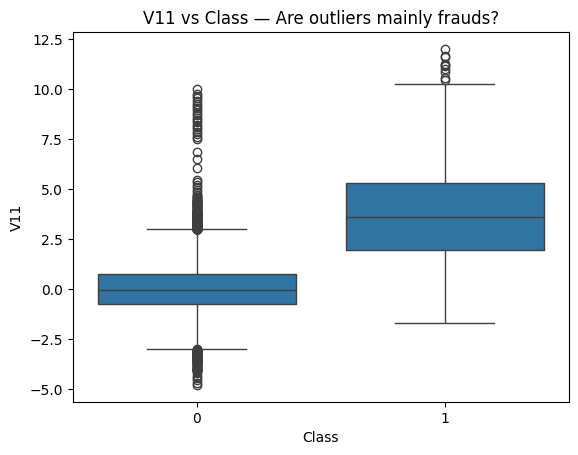

In [16]:
sns.boxplot(x='Class', y='V11', data=df)
plt.title('V11 vs Class — Are outliers mainly frauds?')
plt.show()


In [17]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [20]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [18]:
legit_sample = legit.sample(n=492)

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
179522,124115.0,1.966076,-0.380489,-1.778759,0.053588,0.395441,-0.298374,0.096311,-0.115234,0.571155,...,0.275895,0.750005,-0.188819,-1.139345,0.300725,-0.052865,-0.036395,-0.069542,68.00,0
4521,3836.0,-0.893605,1.258638,1.466270,1.858800,-0.191371,0.361775,0.472154,-0.147436,1.328050,...,-0.107802,-0.041077,-0.169794,0.009301,-0.196508,-0.201041,-0.313667,0.149778,48.97,0
140251,83620.0,-0.753585,0.525275,2.217226,2.581204,-0.212239,0.789452,-0.372467,0.437050,-0.544857,...,0.355769,1.112466,0.211703,0.210876,-1.064736,0.072686,-0.005610,0.254126,12.70,0
39839,39990.0,-0.755664,-0.768476,2.024056,-2.342246,-0.629422,-0.020398,-0.223224,-0.083516,-1.632641,...,-0.469340,-0.765258,-0.247910,-0.346150,0.220943,-0.391169,-0.166066,-0.199584,50.00,0
94069,64712.0,1.184729,-0.280352,0.364772,-1.485013,-0.645693,-0.746235,-0.165197,-0.037486,0.828061,...,-0.180264,-0.449375,0.152854,0.246409,0.138516,-0.268192,0.016963,0.013201,20.35,0


In [22]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [28]:
model = LogisticRegression()
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

c:\Users\jmaae\anaconda3\envs\scooter-pred\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9644218551461246


In [32]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437
